<a href="https://colab.research.google.com/github/Shaikmd3797/Sentiment-Analysis-for-Movie-Review-dataset/blob/main/MODEL_FOR_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***MODEL NLP DATASETS***

* # algorithm that deals with text/language related data is called NLP algorithms.

* # This model can be predict the reviews are positive or negative with use of  text datas.

* # we get IMDB dataset from kaggle website  





# ***synopsis***

1.   # importing the dataset 
2.   # preprocessing the data
3. # encodind the data
4. # Build the model
5. # evaluation metric






# **1)IMPORTING THE DATASET**

*DATASET:*
> IMDB dataset contains a two column . One is Review column. it has full of text datatypes.

> Second column is sentiment column. it had two values which is positive or negative.it was target column to predict variable for new reviews.

> the dataset contains more than 50000 rows. which means more than 50000 reviews init.









In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# ***ii) Checking the imbalanced data***



In [3]:
def check_imbalance(data,target):
  count_data=pd.DataFrame(data[target].value_counts()).reset_index()
  count_data.columns=[target,'count']
  count_data['percentage']=(count_data['count']/sum(count_data['count']))*100
  count_data.columns=[target,'count','percentage']
  return count_data

In [4]:
count=check_imbalance(df,'sentiment')
count

,sentiment,count,percentage
0,positive,25000,50.0
1,negative,25000,50.0


# **target column has a only two class. So it is a binary classification problem**
# **this dataset is heavily balanced dataset. minority class contains 50% of data in whole dataset

In [5]:
df['sentiment']=df.sentiment.map({'positive':1,'negative':0})
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


# **2) preprocessing the data**



### Some common Problems:


1.   Remove Punctuation
2.   Replace short words
3.   Making text lower case
4.   Remove stopwords
5.   Lemmatization

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [7]:
stop_words=stopwords.words('english')
add_words=['movie','film','one','make','even',"n't",'see','movies','get','makes','making','time','watch','character','good','like','also','would','actors','hero']
stop_words.extend(add_words)
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
def short_tag(detail_tag):
    if detail_tag.startswith('J'):
        return wordnet.ADJ
    elif detail_tag.startswith('V'):
        return wordnet.VERB
    elif detail_tag.startswith('N'):
        return wordnet.NOUN
    elif detail_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

In [9]:
df['preprocessed']=df['review'].str.replace("[^a-zA-Z0-9]"," ") # punchuation removing 

<ipython-input-9-d53295ae5158>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['preprocessed']=df['review'].str.replace("[^a-zA-Z0-9]"," ") # punchuation removing


In [12]:
def preprocessing(review,stop_words):
  remove_stop=[]
  token=nltk.word_tokenize(review)
  for j in token:
    j=j.lower()
    if len(j)>2:
      if j not in stop_words:
        remove_stop.append(j)
  new_rev=' '.join(remove_stop)
  return new_rev
  lemmatize_sentence = []
  lemmatizer=WordNetLemmatizer()
  nltk_tag=nltk.pos_tag(nltk.word_tokenize(new_rev))
  wordnet_tag=map(lambda x:(x[0],short_tag(x[1])),nltk_tag)
  for word,tag in wordnet_tag:
    if tag is None:
      lemmatize_sentence.append(word)
    else:
      lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
  return ' '.join(lemmatize_sentence)
   
 

In [13]:
df['preprocessed']=[preprocessing(review,stop_words) for review in df['preprocessed']]
df

,review,sentiment,preprocessed
0,One of the other reviewers has mentioned that ...,1,reviewers mentioned watching episode hooked ri...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend hot summer weekend...
3,Basically there's a family where a little boy ...,0,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love money visually stunning mat...
...,...,...,...
49995,I thought this movie did a down right good job...,1,thought right job creative original first expe...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,0,catholic taught parochial elementary schools n...
49998,I'm going to have to disagree with the previou...,0,going disagree previous comment side maltin se...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review        50000 non-null  object
 1   sentiment     50000 non-null  int64 
 2   preprocessed  50000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


# **3) plotting the frequency of words**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from nltk import FreqDist

In [16]:
def plot_word_distribute(data,target):
  data_pos=data.loc[data[target]==1,:]
  data_neg=data.loc[data[target]==0,:]
  all_pos_sentence=[]
  for text in data_pos['preprocessed']:
    all_pos_sentence.append(text)
  pos_words=" ".join(all_pos_sentence).split()
  words_pos=FreqDist(pos_words)
  pos_df=pd.DataFrame({'words':list(words_pos.keys()),'count':list(words_pos.values())})
  pos_df = pos_df.nlargest(columns="count", n = 50)
  pos_df.sort_values('count', inplace=True)
  plt.figure(figsize=(20,10))
  ax = plt.barh(pos_df['words'], width = pos_df['count'])
  plt.show()
  
  all_neg_sentence=[]
  for text in data_neg['preprocessed']:
    all_neg_sentence.append(text)
  neg_words=" ".join(all_neg_sentence).split()
  words_neg=FreqDist(neg_words)
  neg_df=pd.DataFrame({'words':list(words_neg.keys()),'count':list(words_neg.values())})
  neg_df = neg_df.nlargest(columns="count", n = 50)
  neg_df.sort_values('count', inplace=True)
  plt.figure(figsize=(20,10))
  ax = plt.barh(neg_df['words'], width = neg_df['count'])
  plt.show()


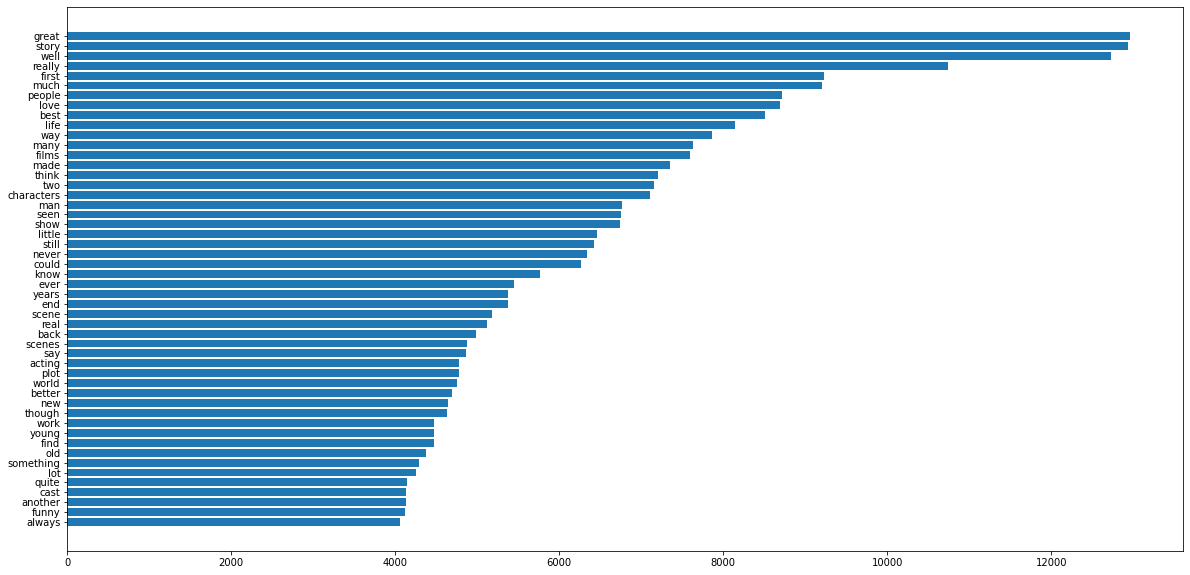

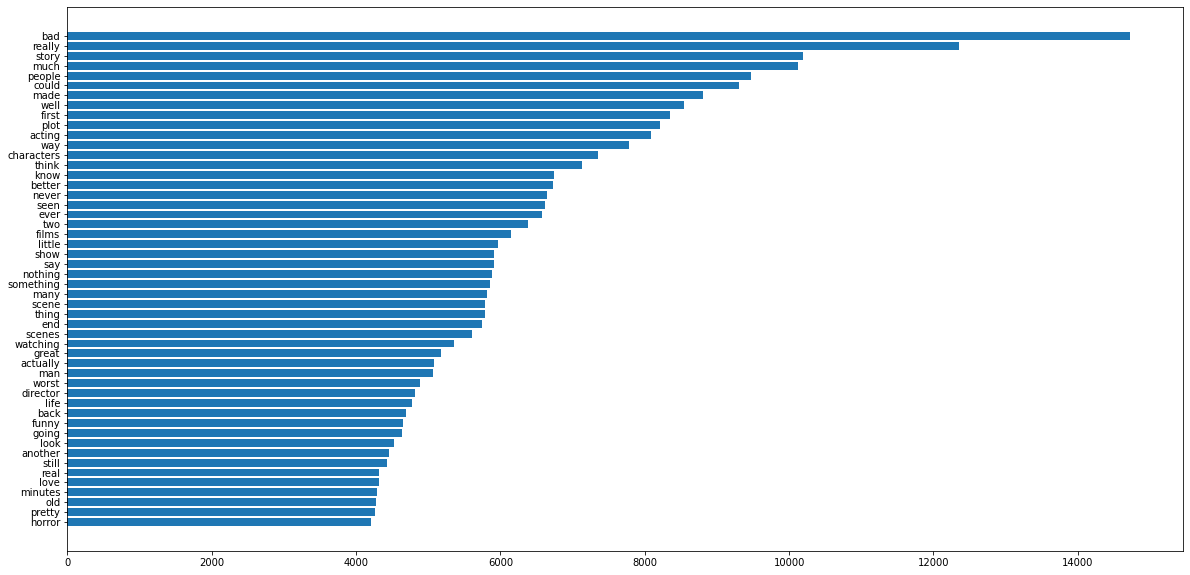

In [17]:
plot_word_distribute(df,'sentiment')

# **4) Encoding the data**

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
def encoding (data,rev,target):
  tfidf=TfidfVectorizer(max_features=2500)
  X = tfidf.fit_transform(data[rev]).toarray()
  y = data[target].values
  featureNames = tfidf.get_feature_names()
  return X,y

In [20]:
X,y=encoding(df,'preprocessed','sentiment')
print(X)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1 1 1 ... 0 0 0]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# **5)Build the model**

In [21]:
def split(X,y):
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=37)# spliting the data
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test=split(X,y)
print(X_train, X_test, y_train, y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [1 0 1 ... 1 1 1] [1 0 1 ... 0 0 1]


In [22]:
def scaling(train,test):
  from sklearn.preprocessing import StandardScaler
  scaler=StandardScaler() #scaling the data  
  X_train_scale=scaler.fit_transform(train) 
  X_test_scale=scaler.transform(test)
  return X_train_scale,X_test_scale

X_train_scale,X_test_scale=scaling(X_train,X_test)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix, f1_score,roc_auc_score

In [24]:
def algorithm (model,X_train, X_test, y_train, y_test,k):
  mod=model
  mod.fit(X_train, y_train)
  y_predict_mod=mod.predict(X_test)
  result= pd.DataFrame({'actual': y_test, 'predict': y_predict_mod})
  score=accuracy_score(y_test,y_predict_mod)
  print('for ' ,k ,' value ',"Train Accuracy : ",round(mod.score(X_train,y_train),3),"Val Accuracy : ", round(np.mean(cross_val_score(mod, X_train, y_train, cv=6)),3))
  return y_predict_mod,result,score,mod

# **i) logistic regression algorithm**

In [25]:
y_predict_log,result_L,score_L,log=algorithm(LogisticRegression(),X_train_scale, X_test_scale, y_train, y_test,1)
print(y_predict_log)
print(result_L)
print(' Score of LogisticRegression algorithmn is ', score_L)

for  1  value  Train Accuracy :  0.906 Val Accuracy :  0.87
[1 0 1 ... 0 0 1]
      actual  predict
0          1        1
1          0        0
2          1        1
3          0        0
4          0        0
...      ...      ...
9995       0        1
9996       0        0
9997       0        0
9998       0        0
9999       1        1

[10000 rows x 2 columns]
 Score of LogisticRegression algorithmn is  0.8749


In [26]:
def confuse_matrix(test,predict):
  cm = confusion_matrix(test,predict)
  return cm

In [27]:
cm_log=confuse_matrix(y_test,y_predict_log)
cm_log

array([[4358,  669],
       [ 582, 4391]])

In [28]:
def evaluate(mod,X_test,y_test,predict):
  acc=accuracy_score(y_test,predict)
  roc=roc_auc_score(y_test,predict)
  fig=plt.figure(figsize=(20,10))
  plot_roc_curve(mod,X_test,y_test)
  print('accuracy score of data set : ', acc)
  print('AUROC  score of data set : ', roc)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


accuracy score of data set :  0.8749
AUROC  score of data set :  0.8749433333476003


<Figure size 1440x720 with 0 Axes>

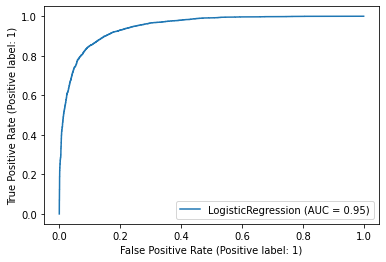

In [29]:
evaluate(log,X_test_scale,y_test,y_predict_log)

# **ii) Decision Tree classifier**

In [30]:
for i in range(10,15):
  algorithm(DecisionTreeClassifier(max_depth=i,random_state=37),X_train_scale, X_test_scale, y_train, y_test,i)

for  1  value  Train Accuracy :  0.616 Val Accuracy :  0.615
for  2  value  Train Accuracy :  0.654 Val Accuracy :  0.653
for  3  value  Train Accuracy :  0.676 Val Accuracy :  0.673
for  4  value  Train Accuracy :  0.678 Val Accuracy :  0.676
for  5  value  Train Accuracy :  0.697 Val Accuracy :  0.69
for  6  value  Train Accuracy :  0.714 Val Accuracy :  0.704
for  7  value  Train Accuracy :  0.729 Val Accuracy :  0.714
for  8  value  Train Accuracy :  0.741 Val Accuracy :  0.723
for  9  value  Train Accuracy :  0.754 Val Accuracy :  0.728


In [31]:
y_predict_dt,result_D,score_D,dt=algorithm(DecisionTreeClassifier(max_depth=13,random_state=37),X_train_scale, X_test_scale, y_train, y_test,13)
print(y_predict_dt)
print(result_D)
print(' Score of Decision Tree algorithmn is ', score_D)

for  13  value  Train Accuracy :  0.785 Val Accuracy :  0.736
[1 1 0 ... 0 1 1]
      actual  predict
0          1        1
1          0        1
2          1        0
3          0        0
4          0        0
...      ...      ...
9995       0        1
9996       0        0
9997       0        0
9998       0        1
9999       1        1

[10000 rows x 2 columns]
 Score of Decision Tree algorithmn is  0.7345


In [32]:
cm_dt=confuse_matrix(y_test,y_predict_dt)
cm_dt

array([[3130, 1897],
       [ 758, 4215]])

accuracy score of data set :  0.7345
AUROC  score of data set :  0.7351073357299099


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1440x720 with 0 Axes>

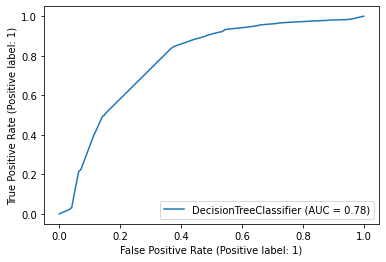

In [33]:
evaluate(dt,X_test_scale,y_test,y_predict_dt)

# **iii)Random Forest Classifier**

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
for i in [10,20,30,40,50,60,70,80,90,100]:
  algorithm(RandomForestClassifier(max_depth= 11,n_estimators=i,random_state=37,max_features='sqrt'),X_train_scale, X_test_scale, y_train, y_test,i)

for  10  value  Train Accuracy :  0.813 Val Accuracy :  0.782
for  20  value  Train Accuracy :  0.837 Val Accuracy :  0.801
for  30  value  Train Accuracy :  0.839 Val Accuracy :  0.803
for  40  value  Train Accuracy :  0.842 Val Accuracy :  0.808
for  50  value  Train Accuracy :  0.845 Val Accuracy :  0.81
for  60  value  Train Accuracy :  0.849 Val Accuracy :  0.813
for  70  value  Train Accuracy :  0.849 Val Accuracy :  0.816
for  80  value  Train Accuracy :  0.851 Val Accuracy :  0.816
for  90  value  Train Accuracy :  0.854 Val Accuracy :  0.82
for  100  value  Train Accuracy :  0.857 Val Accuracy :  0.822


In [39]:
y_predict_rfc,result_R,score_R,rfc=algorithm(RandomForestClassifier(max_depth= 11,n_estimators=100,random_state=37,max_features='sqrt'),X_train_scale, X_test_scale, y_train, y_test,89)
print(y_predict_rfc)
print(result_R)
print(' Score of random forest algorithmn is ', score_R)

for  89  value  Train Accuracy :  0.857 Val Accuracy :  0.822
[1 1 0 ... 0 0 1]
      actual  predict
0          1        1
1          0        1
2          1        0
3          0        0
4          0        0
...      ...      ...
9995       0        0
9996       0        0
9997       0        0
9998       0        0
9999       1        1

[10000 rows x 2 columns]
 Score of random forest algorithmn is  0.8239


In [38]:
cm_rfc=confuse_matrix(y_test,y_predict_rfc)
cm_rfc

array([[3868, 1159],
       [ 610, 4363]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


accuracy score of data set :  0.8239
AUROC  score of data set :  0.8241880933248014


<Figure size 1440x720 with 0 Axes>

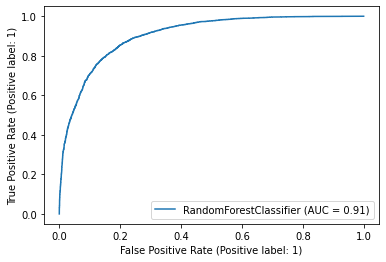

In [40]:
evaluate(rfc,X_test_scale,y_test,y_predict_rfc)

# **iv)Voting classifier**

In [43]:
from sklearn.ensemble import VotingClassifier

In [44]:
y_predict_vot,result_V,score_V,vot=algorithm(VotingClassifier(estimators= [('LR',log),('DT',dt),('RF',rfc)],voting='soft'),X_train_scale, X_test_scale, y_train, y_test,'5 models')
print(y_predict_vot)
print(result_V)
print(' Score of Voting classifier algorithmn is ', score_V)

for  5 models  value  Train Accuracy :  0.904 Val Accuracy :  0.859
[1 1 1 ... 0 0 1]
      actual  predict
0          1        1
1          0        1
2          1        1
3          0        0
4          0        0
...      ...      ...
9995       0        1
9996       0        0
9997       0        0
9998       0        0
9999       1        1

[10000 rows x 2 columns]
 Score of Voting classifier algorithmn is  0.864


In [45]:
cm_vot=confuse_matrix(y_test,y_predict_vot)
cm_vot

array([[4211,  816],
       [ 544, 4429]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


accuracy score of data set :  0.864
AUROC  score of data set :  0.8641429184075007


<Figure size 1440x720 with 0 Axes>

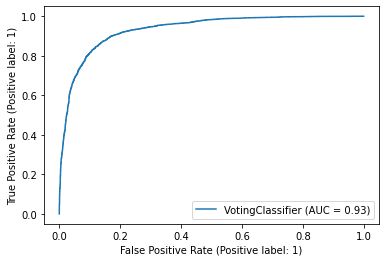

In [46]:
evaluate(vot,X_test_scale,y_test,y_predict_vot)